# **Clustering Spotify Songs**
So what is Clustering?<br>


---


**Clustering :**
The process of making a group of abstract objects into classes of similar objects is known as clustering.

*Points to Remember :*
One group is treated as a cluster of data objects.


*   In the process of cluster analysis, the first step is to partition the set of data into groups with the help of data similarity, and then groups are assigned to their respective labels.
*   The biggest advantage of clustering over-classification is it can adapt to the changes made and helps single out useful features that differentiate different groups
<br>

*Applications of cluster analysis :*<br>
It is widely used in many applications such as image processing, data analysis, and pattern recognition.

*   It helps marketers to find the distinct groups in their customer base and they can characterize their customer groups by using purchasing patterns.
*   It can be used in the field of biology, by deriving animal and plant taxonomies, identifying genes with the same capabilities.
*   It can be used in the field of biology, by deriving animal and plant taxonomies, identifying genes with the same capabilities.
*   It also helps in information discovery by classifying documents on the web.

*Clustering Methods :*
It can be classified based on the following categories.

*   Model-Based Method<br>
*   Heirarchial Method<br>
*   Constraint-Based Method<br>
*   Grid-Based Method<br>
*   Partitioning Method<br>
*   Density-Based Method

# **Dataset**

The dataset contains audio_features data to different types of songs. All songs were extracted using Spotify API.<br>
Features:<br>
**Acousticness** - The higher the value the more acoustic the song is.<br>
**Danceability** - The higher the value, the easier it is to dance to this song.<br>
**Energy** - The energy of a song - the higher the value, the more energtic. song.<br>
**Instrumentalness** - The higher the value the greater likelihood the song contains no vocals. Liveness - The higher the value, the more likely the song is a live recording.<br>
**Loudness** (dB) - The higher the value, the louder the song.<br>
**Speechiness** - The higher the value the more spoken word the song contains.<br>
Valence - The higher the value, the more positive mood for the song.

In [56]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as  plt
%matplotlib inline

In [73]:
# Import Necessary Algorithms
import pylab as pl
from sklearn.cluster import KMeans #https://scikit-learn.org/stable/modules/clustering.html#k-means
from sklearn.decomposition import PCA #https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.preprocessing import StandardScaler #https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.manifold import TSNE #https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
import scipy.cluster.hierarchy as hcd #https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html
from sklearn.cluster import AgglomerativeClustering #https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
from sklearn.cluster import DBSCAN

In [14]:
# HDBSCAN extends DBSCAN by converting it into a hierarchical clustering algorithm, 
# and then using a technique to extract a flat clustering based in the stability of clusters. 
!pip install HDBSCAN

     |████████████████████████████████| 4.7MB 5.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for HDBSCAN: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2301809 sha256=b6a52eb73085a902e75be5b51f5a47077e745cba23e16d0d2e6e71e7c3d18196
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built HDBSCAN


In [74]:
import hdbscan

In [ ]:
#Lets upload the dataset
from google.colab import files
uploaded = files.upload()

In [76]:
df = pd.read_csv('data1996.csv')
df.head()

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,TOOL,Jimmy,09KJ3XQZ9RQ5prbSp59Wbc,54,0.007460,0.477,324427,0.688,0.211,7,0.1310,-8.256,0,0.0373,126.291,3,0.4550
1,TOOL,(-) Ions,0KCdkjFn7as5rME8dInqGQ,48,0.938000,0.223,240573,0.567,0.693,9,0.3230,-24.483,1,0.5800,127.091,4,0.0301
2,TOOL,Eulogy,0RVFjx2HwbHcl5SCSADpFP,57,0.005560,0.517,505147,0.646,0.783,4,0.0985,-9.059,0,0.1370,165.653,4,0.3610
3,TOOL,Ænema,0nLOl4fSiBZKGFla5pLUtf,58,0.001930,0.335,399267,0.849,0.256,0,0.0928,-6.927,1,0.3190,181.701,3,0.2560
4,TOOL,Stinkfist,0pwObEOHolQZSldJ2q1wpy,62,0.000174,0.286,312120,0.728,0.837,0,0.1330,-6.608,1,0.0616,171.454,4,0.4670


In [77]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,1980.000000,1980.000000,1980.000000,1.980000e+03,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000
mean,37.333838,0.290185,0.592300,2.564319e+05,0.605132,0.052941,5.374747,0.200944,-9.286065,0.659091,0.067867,121.234809,3.909091,0.566733
std,13.414719,0.288094,0.155714,8.610298e+04,0.222543,0.175446,3.519952,0.176537,3.681333,0.474135,0.082010,29.705248,0.377243,0.256536
min,4.000000,0.000001,0.100000,3.457300e+04,0.008960,0.000000,0.000000,0.017800,-32.727000,0.000000,0.023000,52.793000,1.000000,0.030100
25%,28.000000,0.034550,0.487000,2.098898e+05,0.440000,0.000000,2.000000,0.090775,-11.318500,0.000000,0.031300,97.628500,4.000000,0.354000
50%,39.000000,0.189500,0.605000,2.479665e+05,0.614000,0.000016,6.000000,0.130000,-8.731000,1.000000,0.039300,119.627500,4.000000,0.579000
75%,47.000000,0.497250,0.708000,2.896565e+05,0.786250,0.001458,9.000000,0.262000,-6.720250,1.000000,0.062125,139.160750,4.000000,0.785000
max,77.000000,0.996000,0.975000,1.768107e+06,0.999000,0.988000,11.000000,0.989000,-0.172000,1.000000,0.941000,212.676000,5.000000,0.986000


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       1980 non-null   object 
 1   track_name        1980 non-null   object 
 2   track_id          1980 non-null   object 
 3   popularity        1980 non-null   int64  
 4   acousticness      1980 non-null   float64
 5   danceability      1980 non-null   float64
 6   duration_ms       1980 non-null   int64  
 7   energy            1980 non-null   float64
 8   instrumentalness  1980 non-null   float64
 9   key               1980 non-null   int64  
 10  liveness          1980 non-null   float64
 11  loudness          1980 non-null   float64
 12  mode              1980 non-null   int64  
 13  speechiness       1980 non-null   float64
 14  tempo             1980 non-null   float64
 15  time_signature    1980 non-null   int64  
 16  valence           1980 non-null   float64


In [79]:
df.shape

(1980, 17)

In [80]:
df.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence'],
      dtype='object')

In [81]:
df.head()

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,TOOL,Jimmy,09KJ3XQZ9RQ5prbSp59Wbc,54,0.007460,0.477,324427,0.688,0.211,7,0.1310,-8.256,0,0.0373,126.291,3,0.4550
1,TOOL,(-) Ions,0KCdkjFn7as5rME8dInqGQ,48,0.938000,0.223,240573,0.567,0.693,9,0.3230,-24.483,1,0.5800,127.091,4,0.0301
2,TOOL,Eulogy,0RVFjx2HwbHcl5SCSADpFP,57,0.005560,0.517,505147,0.646,0.783,4,0.0985,-9.059,0,0.1370,165.653,4,0.3610
3,TOOL,Ænema,0nLOl4fSiBZKGFla5pLUtf,58,0.001930,0.335,399267,0.849,0.256,0,0.0928,-6.927,1,0.3190,181.701,3,0.2560
4,TOOL,Stinkfist,0pwObEOHolQZSldJ2q1wpy,62,0.000174,0.286,312120,0.728,0.837,0,0.1330,-6.608,1,0.0616,171.454,4,0.4670


In [82]:
new_df = df.drop(columns=['artist_name', 'track_name','track_id','key','mode','time_signature','popularity'])
new_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.007460,0.477,324427,0.688,0.211,0.1310,-8.256,0.0373,126.291,0.4550
1,0.938000,0.223,240573,0.567,0.693,0.3230,-24.483,0.5800,127.091,0.0301
2,0.005560,0.517,505147,0.646,0.783,0.0985,-9.059,0.1370,165.653,0.3610
3,0.001930,0.335,399267,0.849,0.256,0.0928,-6.927,0.3190,181.701,0.2560
4,0.000174,0.286,312120,0.728,0.837,0.1330,-6.608,0.0616,171.454,0.4670


In [83]:
new_df.shape

(1980, 10)

In [84]:
'''The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.'''
scaled = StandardScaler().fit_transform(new_df)
df_scaled = pd.DataFrame(scaled, columns=new_df.columns)
df_scaled.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,-0.981611,-0.740647,0.789894,0.372464,0.901130,-0.396301,0.279878,-0.372824,0.170255,-0.435656
1,2.249191,-2.372255,-0.184232,-0.171388,3.649116,0.691564,-4.129149,6.246355,0.197193,-2.092374
2,-0.988207,-0.483701,2.889307,0.183689,4.162225,-0.580445,0.061696,0.843193,1.495676,-0.802169
3,-1.000811,-1.652806,1.659306,1.096103,1.157685,-0.612740,0.640980,3.063002,2.036053,-1.211572
4,-1.006907,-1.967565,0.646925,0.552251,4.470091,-0.384969,0.727655,-0.076443,1.691010,-0.388867


In [85]:
class Clustering:
    def k_means(self, df, n_clusters):
        '''predict clusters using kmeans'''
        cluster = KMeans(n_clusters=n_clusters)
        df["cluster"] = cluster.fit_predict(df[df.columns])
        return df
    
    def agglomerative_clustering(self, df, n_clusters, affinity, linkage):
        '''predict clusters using hierarchical clustering'''
        hc = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage)
        df['cluster'] = hc.fit_predict(df)
        return df
    
    def density_based_clustering(self, df, eps, metric, min_samples):
        '''predict clusters using dbscan'''
        dbscan_df = DBSCAN(eps=eps, metric=metric, min_samples=min_samples).fit(df)
        labels = dbscan_df.labels_
        df["cluster"] = dbscan_df.fit_predict(df)                                                              
        return df
    
    def hierarchical_density_based_clustering(self, df, min_cluster_size, gen_min_span_tree=True):
        '''predict clusters using hdbscan'''
        clusterer_hdbscan = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, gen_min_span_tree=gen_min_span_tree)
        clusterer_hdbscan.fit(df)
        df["cluster"] = clusterer_hdbscan.fit_predict(df) 
        return df

In [86]:
class DimentionReduction:
    def pca_transform(self, df_scaled, n_components):
        '''dimentionality reduction using pca'''
        pca = PCA(n_components=n_components)
        pcomponents = pca.fit_transform(df_scaled)
        pca_df = pd.DataFrame(data = pcomponents, columns = ['PC1', 'PC2'])
        ratio = pca.explained_variance_ratio_
        return pca_df, ratio
        
    def tsne_transform(self, df, n_components):
        '''dimentionality reduction using tsne'''
        tsne = TSNE(n_components=n_components).fit_transform(df)
        return tsne

In [87]:
class Visualization:
    def __init__(self):
        sns.set(rc={'figure.figsize': (11.7, 6.27)})
        self.palette = "viridis"
        self.color = "darkblue"
        
    def plot_elbow_curve(self, df, num):
        '''plot elbow curve to choose number of clusters'''
        k = range(1, num)
        kmeans = [KMeans(n_clusters=i) for i in k]
        score = [kmeans[i].fit(df[df.columns]).score(df[df.columns]) for i in range(len(kmeans))]
        pl.plot(k, score)
        pl.xlabel('Number of Clusters')
        pl.ylabel('Score')
        pl.title('Elbow Curve')
        pl.show()
        
    def plot_pca(self, pca_df, df, cluster_column):
        '''scatterplot to visualize after pca transformation'''
        sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=df[cluster_column], palette=self.palette)
        plt.xlabel('First principle component')
        plt.ylabel('Second principle component')
        plt.show()
        
    def plot_tsne(self, tsne_df, df, cluster_column):
        '''scatterplot to visualize after tsne transformation'''
        sns.scatterplot(x=tsne_df[:, 0], y=tsne_df[:, 1], hue=df[cluster_column], palette=self.palette)
        plt.xlabel('First tsne component')
        plt.ylabel('Second tsne component')
        plt.show()
        
    def plot_dendrogram(self, df, metric, method):
        '''plot dendrogram to choose number of clusters'''
        plt.style.use('ggplot')
        hcd.set_link_color_palette(["#B061FF", "#7a0177"])
        dendrogram = hcd.dendrogram(hcd.linkage(df, metric=metric, method=method))
        plt.title('Dendrogram', size=20)
        plt.xlabel('Customers', size=15)
        plt.ylabel('Euclidean Distances', size=15)
        plt.show()
        
    def plot_clusters(self, df, cluster):
        '''plot clusters interpretation'''
        sns.set_style("whitegrid")
        bins = np.linspace(0,1,10)
        fig, ax = plt.subplots(1, 6, figsize=(15, 3))
        cluster_df = df[df.cluster == cluster]
        cluster_features = ['acousticness', 'danceability', 'instrumentalness', 'energy', 'speechiness', 'tempo']
        col = 0
        for feature in cluster_features:
            general = df.groupby(pd.cut(df[feature], bins)).size().reset_index(name='count')
            cluster = cluster_df.groupby(pd.cut(cluster_df[feature], bins)).size().reset_index(name='count')
            sns.barplot(data=general, x=feature, y='count', color='#efedf5', ax=ax[col])
            sns.barplot(data=cluster, x=feature, y='count', color='#54278f', ax=ax[col])
            ax[col].set_xticklabels(range(1,10), fontsize=12)
            col += 1
        plt.show()

In [88]:
clustering = Clustering()
dimention = DimentionReduction()
plot = Visualization()

# **KMeans Clustering**<br>
Cluster size 8 looks most reasonable based on the Elbow Curve

1. Use Scaled dataset
2. Elbow_curve
3. K-Means with n_clusters
4. PCA visualize
5. TSNE visualize
# **Plot Elbow Curve**

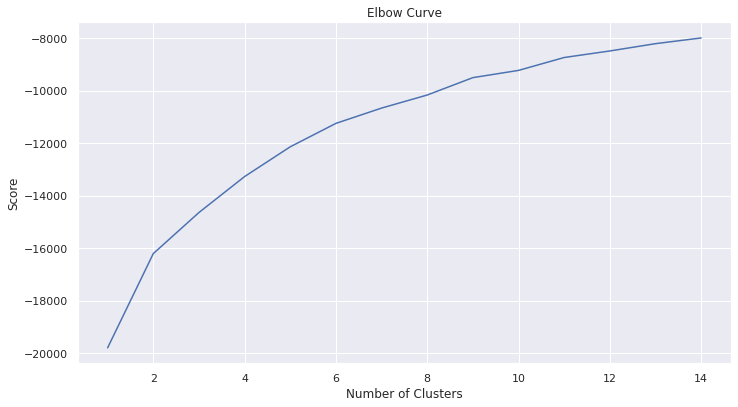

In [94]:
plot.plot_elbow_curve(df_scaled, 15)

In [95]:
# n_cluster = 8 
kmeans_df = clustering.k_means(df_scaled , 8)

In [96]:
kmeans_df.groupby([kmeans_df.cluster == 7]).size()

cluster
False    1978
True        2
dtype: int64

**Visualization using PCA (K-Means)**

In [97]:
kmeans_df_transform , ration =  dimention.pca_transform(kmeans_df , 2)

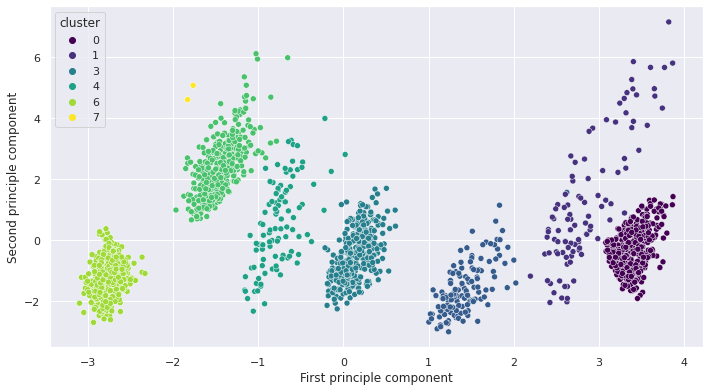

In [100]:
plot.plot_pca(kmeans_df_transform, kmeans_df, 'cluster')

**Visualization using TSNE (K-Means)**

[*t-Distributed Stochastic Neighbor Embedding is a non-linear dimensionality reduction algorithm used for exploring high-dimensional data. It maps multi-dimensional data to two or more dimensions suitable for human observation.*]



In [101]:
kmeans_tsne = dimention.tsne_transform(kmeans_df, 2)

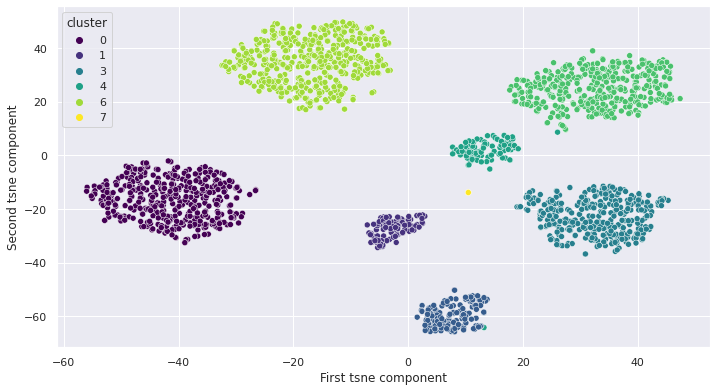

In [103]:
plot.plot_tsne(kmeans_tsne, kmeans_df, 'cluster')

**Visualization segments**

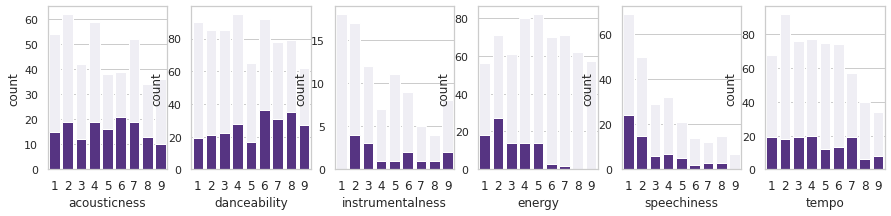

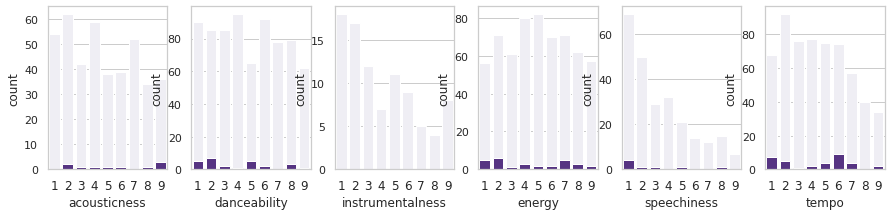

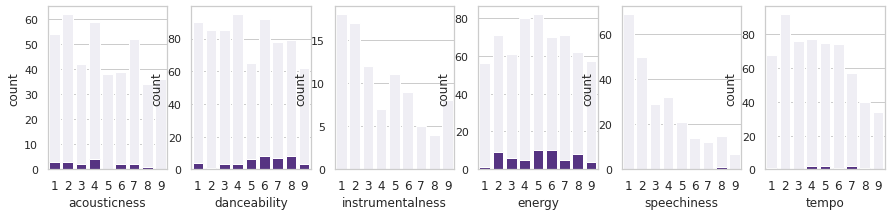

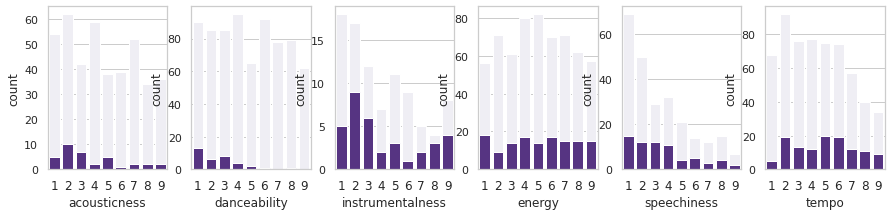

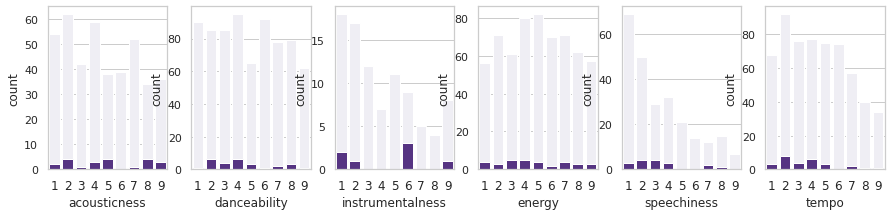

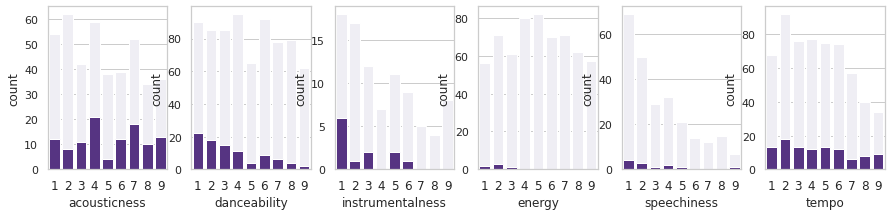

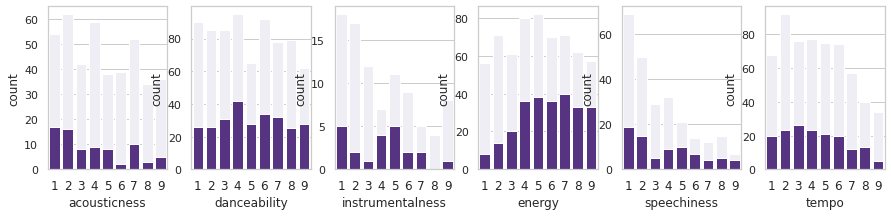

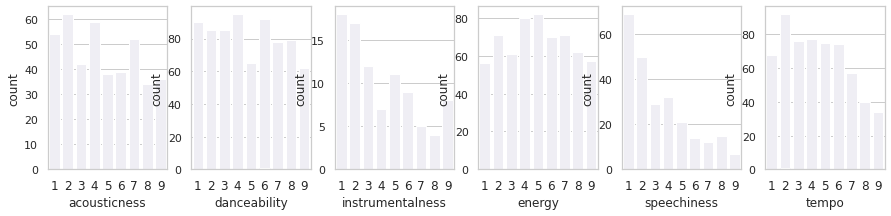

In [104]:
for i in np.sort(kmeans_df['cluster'].unique()):
    plot.plot_clusters(kmeans_df, i)

# **Hierarchical Clustering**

**Dendogram - Finding Optimal Number of Clusters**<br>
[*A **dendrogram** is a diagram that shows the hierarchical relationship between objects. It is most commonly created as an output from hierarchical clustering. The main use of a dendrogram is to work out the best way to allocate objects to clusters*]<br>

Cluster size 8 looks most reasonable based on the Dendogram.

1. Use Scaled dataset
2. Dendrogram
3. Agglomerative Clustering
4. PCA visualize
5. TSNE visualize

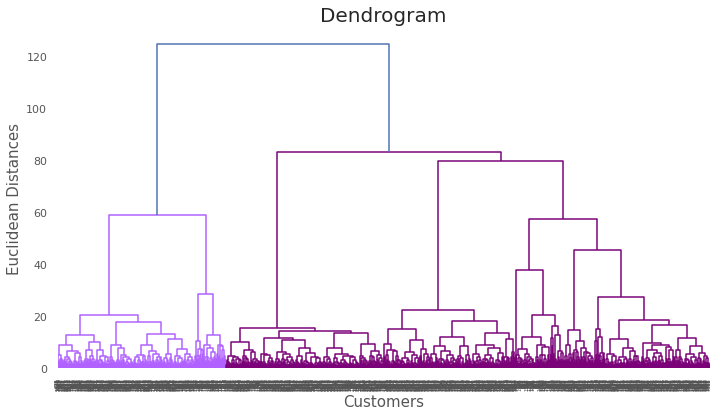

In [108]:
plot.plot_dendrogram(df_scaled, 'euclidean', 'ward')

**Visualization using PCA (Hierarchical Clustering)**

In [109]:
hc_df = clustering.agglomerative_clustering(df_scaled, 8, 'euclidean', 'ward')

In [110]:
hc_df.cluster.unique()

array([2, 3, 0, 5, 4, 6, 1, 7])

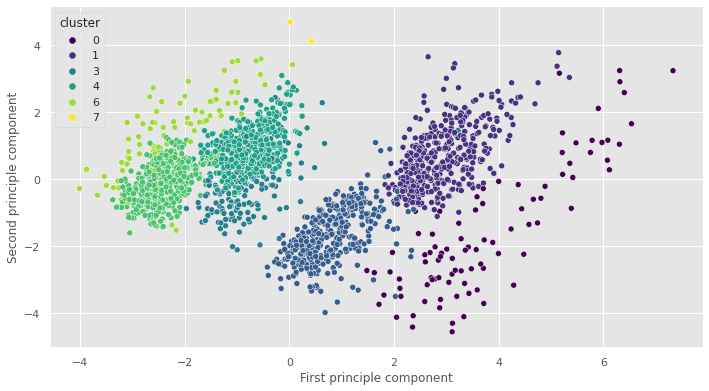

In [111]:
hc_df_transform, ratio = dimention.pca_transform(hc_df, 2)
plot.plot_pca(hc_df_transform, hc_df, 'cluster')

**Visualization using TSNE (Hierarchical Clustering)**

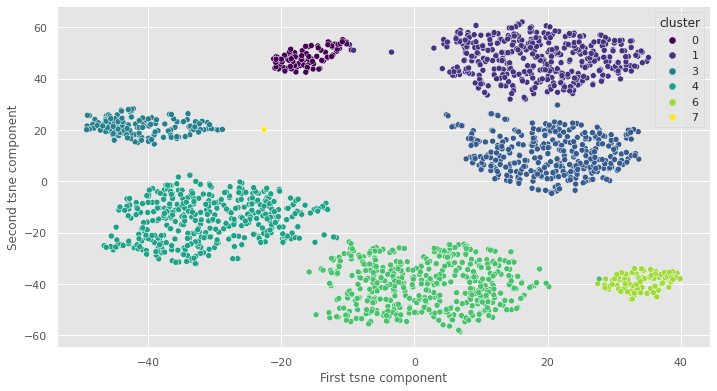

In [112]:
hc_tsne = dimention.tsne_transform(hc_df, 2)
plot.plot_tsne(hc_tsne, hc_df, 'cluster')

**Visualization segments**

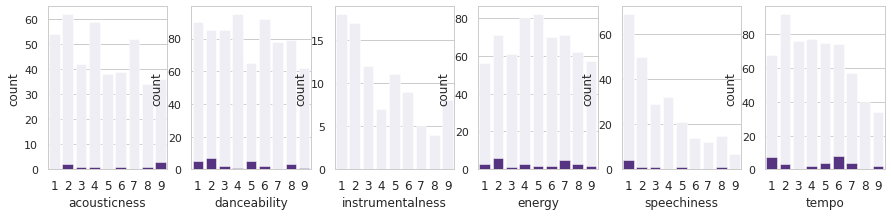

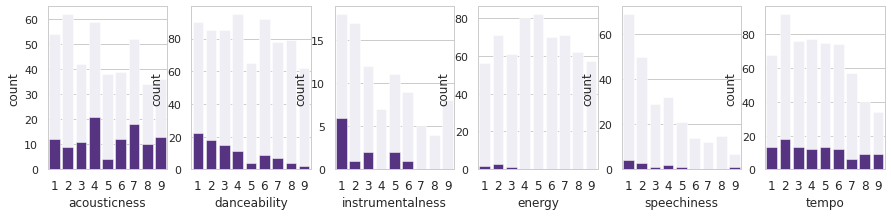

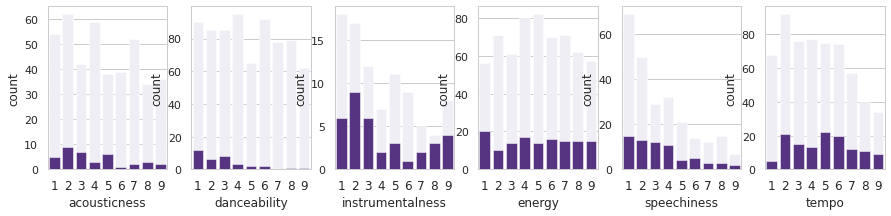

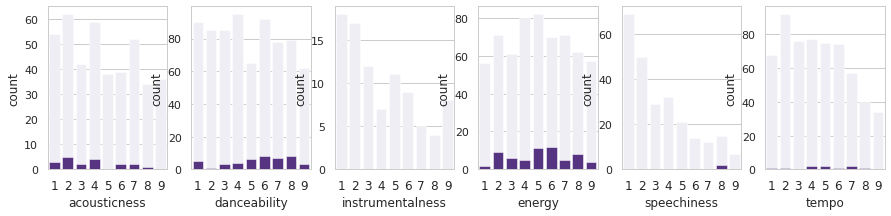

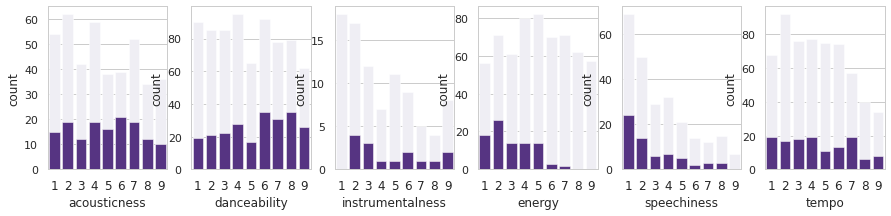

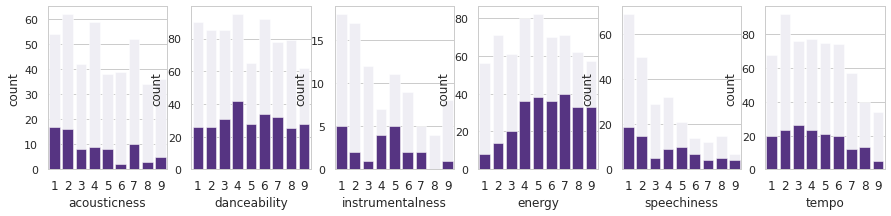

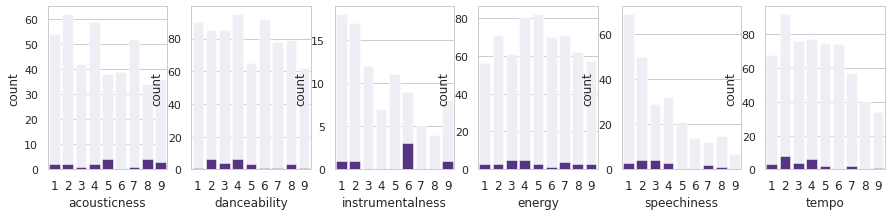

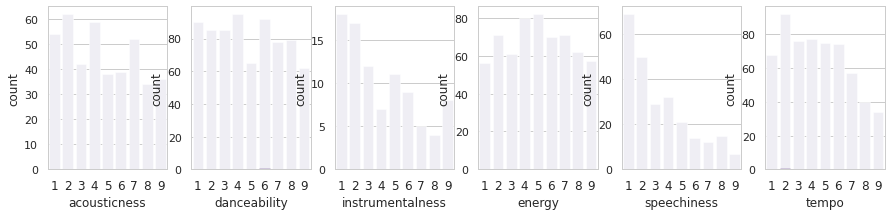

In [116]:
for i in np.sort(hc_df['cluster'].unique()):
  plot.plot_clusters(hc_df , i)
  

# **DBSCAN**
1. Use Scaled dataset
2. Density Based Clustering with 
3. parameters eps and min
4. PCA visualize
5. TSNE visualize

In [117]:
density_df = clustering.density_based_clustering(df_scaled, 0.5, 'euclidean', 6)

In [118]:
density_df.cluster.unique()

array([-1])

**Visualization using TSNE (DBSCAN)**

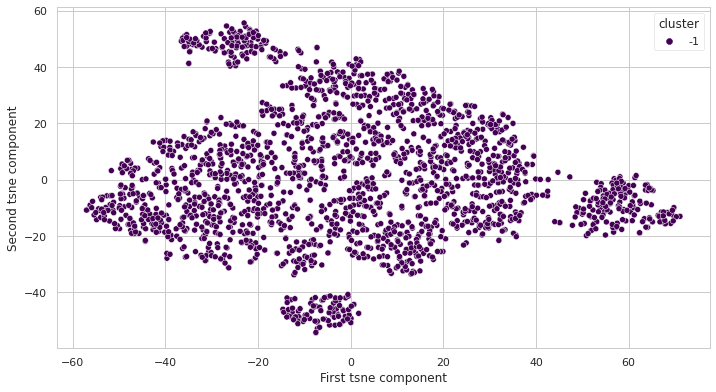

In [119]:
density_tsne = dimention.tsne_transform(density_df, 2)
plot.plot_tsne(density_tsne, density_df, 'cluster')

**Visualization using PCA (DBSCAN)**

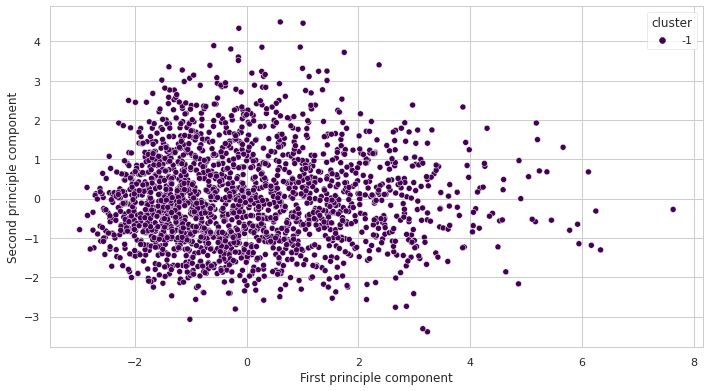

In [120]:
#density_df_scaled = data.standard_scaler(density_df)
density_df_transform, ratio = dimention.pca_transform(density_df, 2)
plot.plot_pca(density_df_transform, density_df, 'cluster')

**Visualization segments**

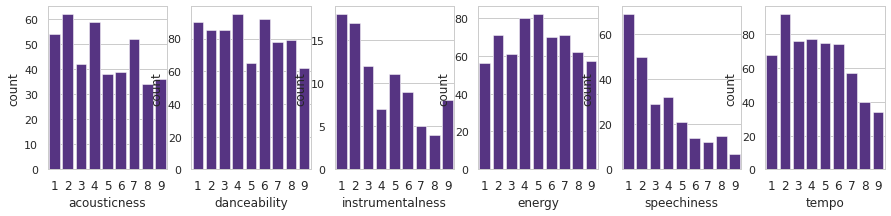

In [121]:
for i in np.sort(density_df['cluster'].unique()):
    plot.plot_clusters(density_df, i)

# **HDBSCAN**

1. Use Scaled dataset
2. Hierarchical Density-Based Clustering with parameter min_cluster_size
3. PCA visualize
4. TSNE visualiz

In [122]:
hdbscan_df = clustering.hierarchical_density_based_clustering(df_scaled, 20, gen_min_span_tree=False)

In [123]:
hdbscan_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,cluster
0,-0.981611,-0.740647,0.789894,0.372464,0.901130,-0.396301,0.279878,-0.372824,0.170255,-0.435656,-1
1,2.249191,-2.372255,-0.184232,-0.171388,3.649116,0.691564,-4.129149,6.246355,0.197193,-2.092374,-1
2,-0.988207,-0.483701,2.889307,0.183689,4.162225,-0.580445,0.061696,0.843193,1.495676,-0.802169,-1
3,-1.000811,-1.652806,1.659306,1.096103,1.157685,-0.612740,0.640980,3.063002,2.036053,-1.211572,-1
4,-1.006907,-1.967565,0.646925,0.552251,4.470091,-0.384969,0.727655,-0.076443,1.691010,-0.388867,-1


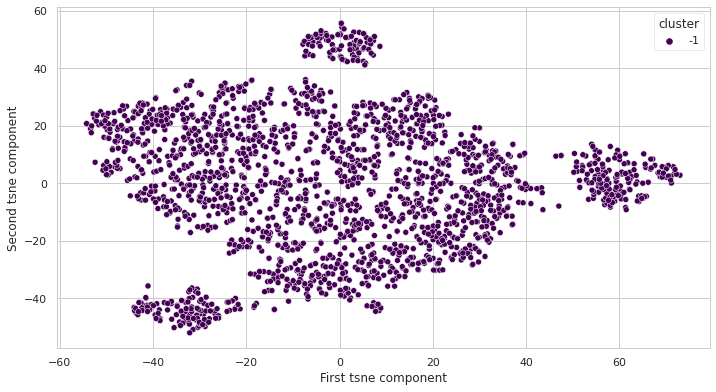

In [124]:
hdbscan_tsne = dimention.tsne_transform(hdbscan_df, 2)
plot.plot_tsne(hdbscan_tsne, hdbscan_df, 'cluster')

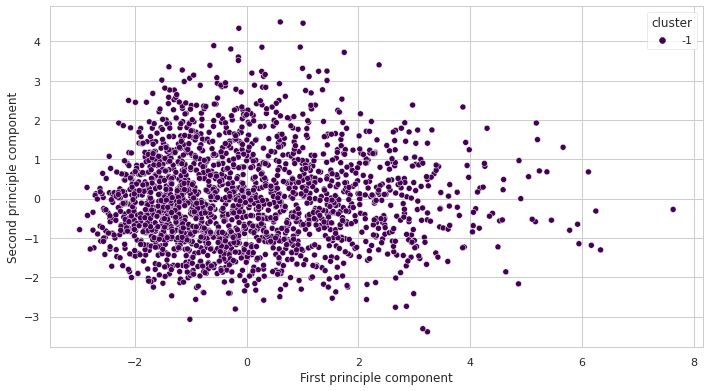

In [125]:

hdbscan_df_transform, ratio = dimention.pca_transform(hdbscan_df, 2)
plot.plot_pca(hdbscan_df_transform, hdbscan_df, 'cluster')

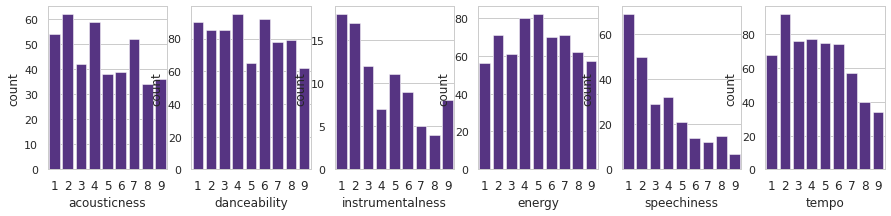

In [126]:
for i in np.sort(hdbscan_df['cluster'].unique()):
    plot.plot_clusters(hdbscan_df, i)